# Movie Summary Analysis

## Team Push-Pull

Son, Bang, Annie

## Introduction


The data set is a set of movie summaries extracted from wikipedia, with metadata extracted from Freebase. The metadata has information regarding the year the movie was released, the genre, runtime, and revenue of each movie. For our report, we want to see how the different movie summaries cluster together, and which of these variables from the metadata clump together. For example, we look into how the year that the film was released, or the runtime of the film comes up in the clusters.

Some of the stakeholders in our analysis are filmmakers and directors of the films in our dataset, or writers who wrote the summaries of the movies for wikipedia, so our analysis should not cause any harm to those who were involved in the production of this media. It is also important for us to consider that this report utilizes data that originally came from a report that studied this before us (David Bamman, Brendan O’Connor, and Noah A. Smith. 2013. "Learning Latent Personas of Film Characters." Proceedings of the 51st Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers): 352–361), and was cleaned by our professor, Matt Lavin. 

In [8]:
import pandas as pd
import gensim.models
import spacy
from collections import Counter
import numpy as np

In [9]:
movie=pd.read_csv("movieSummariesSampleTop10Genres.csv")
movie.head()

,Unnamed: 0,wiki_id,freebase_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,...,finance_&_investing,sponsored_film,humour,filmed_play,supermarionation,historical_documentaries,period_horror,conspiracy_fiction,revisionist_fairy_tale,english
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",...,0,0,0,0,0,0,0,0,0,1
1,1,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",...,0,0,0,0,0,0,0,0,0,1
2,2,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",...,0,0,0,0,0,0,0,0,0,1
3,3,156558,/m/014k4y,Baby Boy,2001-06-27,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",...,0,0,0,0,0,0,0,0,0,1
4,4,9548445,/m/02pjlrp,Archie: To Riverdale and Back Again,1990-05-06,NaN,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z4y"": ""Comedy""}",...,0,0,0,0,0,0,0,0,0,1


In [10]:
summaries_dict={}
with open("plotSummarySampleTop10Genres.txt",encoding="utf-8") as f:
    summaries=f.read().split("\n")
    n=0
    for summary in summaries[:-1]:
        id_summary=summary.split("\t")
        summaries_dict[int(id_summary[0])]=id_summary[1]
        

In [11]:
model_location = "223/model.txt"
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(model_location, binary=False)
nlp=spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words #Load stopwords

## Embeddings Model Exploration and Validation

In [12]:
print(type(word_vectors))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [13]:
v = word_vectors['france_PROPN'] - word_vectors['paris_PROPN'] + word_vectors['berlin_PROPN']
print(word_vectors.most_similar(v))
v = word_vectors['france_PROPN'] - word_vectors['paris_PROPN'] + word_vectors['rome_PROPN']
print(word_vectors.most_similar(v))
v = word_vectors['france_PROPN'] - word_vectors['paris_PROPN'] + word_vectors['pretoria_PROPN']
print(word_vectors.most_similar(v))


v = word_vectors['king_PROPN'] - word_vectors['man_PROPN'] + word_vectors['woman_PROPN']
print(word_vectors.most_similar(v))
v = word_vectors['doctor_PROPN'] - word_vectors['man_PROPN'] + word_vectors['woman_PROPN']
print(word_vectors.most_similar(v))
v = word_vectors['engineer_PROPN'] - word_vectors['man_PROPN'] + word_vectors['woman_PROPN']
print(word_vectors.most_similar(v))

v = word_vectors['cloud_PROPN'] - word_vectors['clouds_PROPN'] + word_vectors['child_PROPN']
print(word_vectors.most_similar(v))
v = word_vectors['cat_PROPN'] - word_vectors['kitten_PROPN'] + word_vectors['puppy_PROPN']
print(word_vectors.most_similar(v))

[('germany_PROPN', 0.751289963722229), ('germany_ADJ', 0.6724568605422974), ('berlin_PROPN', 0.6563971042633057), ('france_PROPN', 0.5852969884872437), ('poland_PROPN', 0.5679988265037537), ('germany_NOUN', 0.5667659044265747), ('austria_PROPN', 0.5655694007873535), ('czechoslovakia_PROPN', 0.5468595623970032), ('bavaria_PROPN', 0.5319903492927551), ('finland_PROPN', 0.5250207185745239)]
[('italy_PROPN', 0.7422422766685486), ('rome_PROPN', 0.686348557472229), ('france_PROPN', 0.6256381273269653), ('italy_ADV', 0.5995866060256958), ('italy_VERB', 0.5745245218276978), ('spain_PROPN', 0.556517481803894), ('sicily_PROPN', 0.5485541820526123), ('sardinia_PROPN', 0.541797935962677), ('corsica_PROPN', 0.5374724268913269), ('greece_PROPN', 0.5354833006858826)]
[('pretoria_PROPN', 0.7608093023300171), ('namibia_PROPN', 0.6104370951652527), ('swaziland_PROPN', 0.6084569692611694), ('zimbabwe_PROPN', 0.6004281640052795), ('zambia_PROPN', 0.5900166034698486), ('bloemfontein_PROPN', 0.5845105648040

## Process Data

In [65]:
nlp_dict={}
for id in movie['wiki_id']:
    nlp_dict[id]=nlp(summaries_dict[id])


In [227]:
wiki_id_most_similar={}
doc_vectors = []
doc2vec = {}
for key in nlp_dict.keys():     # Iterates over the keys in the `nlp_dict` dictionary.
    token_pos_pairs = []
    array_sum = 0
    sample_vectors = Counter()
    total_count=0
    for token in nlp_dict[key]:
        if token.text.lower() not in stopwords and token.pos_ not in ['PUNCT', 'SPACE', 'NUM', 'SYM', 'ADP', 'AUX', 'DET', 'PART', 'SCONJ']:
            # lowercase 
            pair = "".join([token.text.lower(), '_', token.pos_])   # Create word to match the vocabulary of the word-vectors model.
            token_pos_pairs.append(pair)
    sample_counter = Counter(token_pos_pairs)               # Create a `Counter` object `sample_counter` from the `token_pos_pairs` list.
    for tp_pair, count in sample_counter.items():           # Iterate over the items in the `sample_counter`.
        try:
            this_vector = count * word_vectors[tp_pair]     # Try to retrieve the word vector for the `tp_pair` from the `word_vectors` dictionary.
            array_sum += this_vector
            total_count+=count
        except:
            pass                                            # If the word vector for the `tp_pair` is not found, pass.
    doc_vectors.append(array_sum/total_count)             # Append the normalized `array_sum` (divided by the `total_count`) to the `doc_vectors` list.
    doc2vec[key] = array_sum/total_count
    
    wiki_id_most_similar[key]=word_vectors.most_similar(array_sum)

## K-Means Clustering

In [76]:
print(len(doc2vec))

10893


The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

Looking at your plot, the "elbow" is the point at which the inertia starts to decrease more slowly. Inertia is a metric that measures the within-cluster sum of squares criterion, which can be thought of as how internally coherent clusters are.

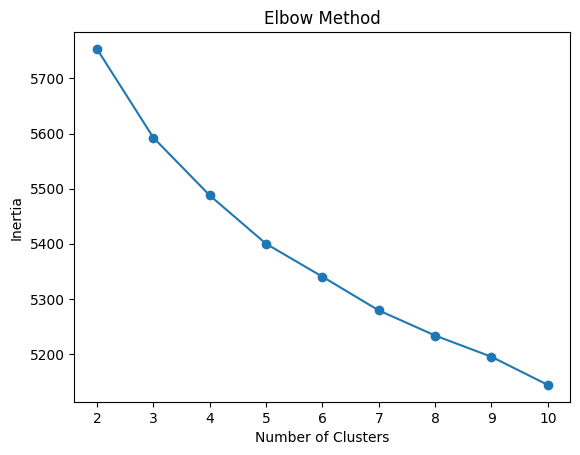

In [228]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of num_clusters
num_clusters_range = range(2, 11)

# Initialize an empty list to store the inertia values
inertia_values = []

# Perform KMeans clustering for each num_clusters and calculate the inertia
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', max_iter=10000, random_state=42)
    kmeans.fit(doc_vectors)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the num_clusters
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In our plot, the curve starts to flatten after the number of clusters increases past 3. The inertia continues to decrease as the number of clusters goes up, but the rate of decrease is not as pronounced after 3 clusters.

Therefore, according to the elbow method, we choose 3 clusters for your data since this is the point after which the inertia's rate of decline becomes less steep, indicating that adding more clusters does not contribute significantly to the model's performance. This is the "elbow" point of the plot.

In [229]:
from sklearn.cluster import KMeans

# Create an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=10000, random_state=42)

# Fit the KMeans model to the doc_vectors
kmeans.fit(doc_vectors)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_


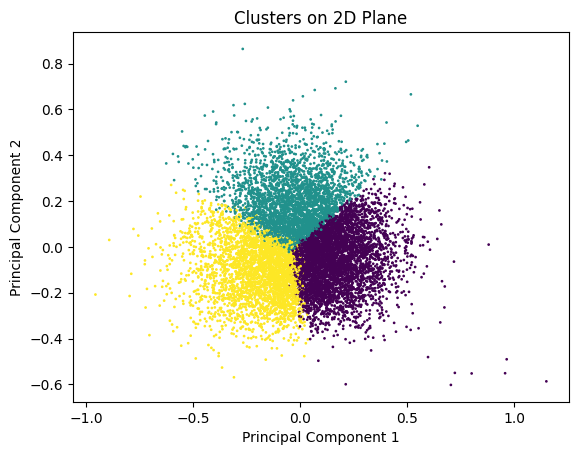

In [230]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
doc_vectors_2d = pca.fit_transform(doc_vectors)

# Plot the clusters on a 2D plane
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], c=cluster_labels, s=0.9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters on 2D Plane')
plt.show()


In [231]:
genres=[genre.split(" ")[1].strip('{}",') for genre in movie["genres"]]
year=[int(rd[:4]) for rd in movie["release_date"]]
movie["year"]=year
movie["first_genre"]=genres
movie["PC1"]=doc_vectors_2d[:,0]
movie["PC2"]=doc_vectors_2d[:,1]

In [232]:
import seaborn as sns

<Axes: xlabel='PC1', ylabel='PC2'>

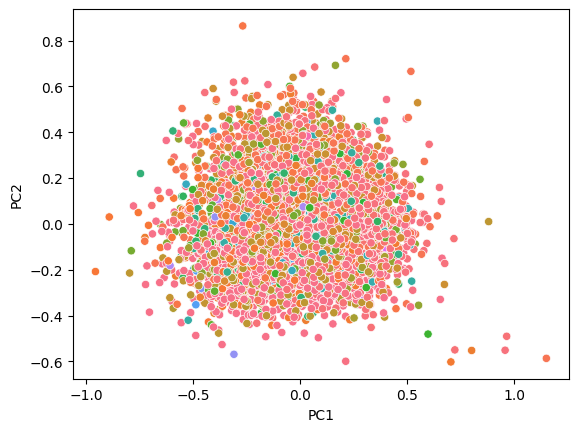

In [233]:
sns.scatterplot( x="PC1", y="PC2", data=movie, hue='first_genre', legend=False)

<Axes: xlabel='PC1', ylabel='PC2'>

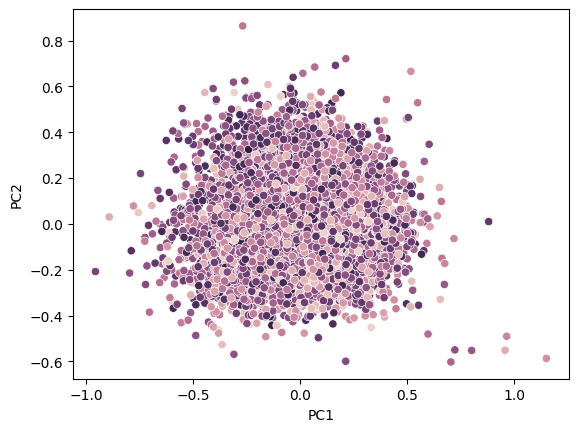

In [234]:
sns.scatterplot( x="PC1", y="PC2", data=movie, hue='year', legend=False)

---
Let's look at the `adventure` genre

In [ ]:
movie.loc[movie["adventure"]==1].sample(6,random_state=13)

In [ ]:
print("The Land Before Time VIII: The Big Freeze: ",nlp_dict[3957383],"\n")
print("The Prince and the Surfer: ",nlp_dict[31855039],"\n")
print("Tekken: ",nlp_dict[17651907],"\n")
print("Stake Land: ",nlp_dict[31500300],"\n")
print("Brave: ",nlp_dict[16839300],"\n")
print("An american tail: the mystery of the night monster: ",nlp_dict[2476119])

According to our hypotheses, since `Brave` and `The Price and the Surfer` both have main character from a royal families background and are somewhat about their families, they will be most likely to be predicted as similar. However, the stories are different and `Brave` has much more detail as well as character. Hence, the similarity score won't be high.

## Nearest Neighbors

In [235]:
def find_nearest_films(movie_name,year):
    # Get the vector representation of the given film ID
    wiki_id=movie.query(f'movie_name=="{movie_name}" & year=={year}')["wiki_id"]
    film_id=int(wiki_id.iloc[0])
    film_vector = doc2vec[film_id]

    # Calculate the cosine similarity between the film vector and all other film vectors
    similarities = {}
    for id, vector in doc2vec.items():
        if id != film_id:
            similarity = np.dot(film_vector, vector) / (np.linalg.norm(film_vector) * np.linalg.norm(vector))
            similarities[id] = similarity

    # Sort the similarities in descending order
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Get the IDs of the 5 most nearest films
    nearest_films = [id for id, _ in sorted_similarities[:5]]
    cosine_sim=[similarities[id] for id in nearest_films]
    nearest_df=movie.loc[movie["wiki_id"].isin(nearest_films)]
    nearest_df["cosine_sim"]=cosine_sim
    pd.options.mode.chained_assignment = None
    return nearest_df[["wiki_id","movie_name","runtime","year","cosine_sim"]]


In [236]:
find_nearest_films("Iron Man",2008)


C:\Users\bangb\AppData\Local\Temp\ipykernel_23260\3823693046.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_df["cosine_sim"]=cosine_sim


,wiki_id,movie_name,runtime,year,cosine_sim
311,22144721,Iron Man 2,124.0,2010,0.963065
3813,22114132,The Avengers,137.0,2012,0.918050
5742,26999426,Captain America: The First Avenger,124.0,2011,0.904668
7326,29075630,The Dark Knight Rises,165.0,2012,0.903559
9148,2101749,Steel,97.0,1997,0.895612


In [237]:
find_nearest_films("Pirates of Treasure Island",2006)


C:\Users\bangb\AppData\Local\Temp\ipykernel_23260\3823693046.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_df["cosine_sim"]=cosine_sim


,wiki_id,movie_name,runtime,year,cosine_sim
360,999394,Pirates of the Caribbean: Dead Man's Chest,151.0,2006,0.935388
2718,649120,Cutthroat Island,118.0,1995,0.916618
5412,1458752,Muppet Treasure Island,95.0,1996,0.913427
9776,1689394,Pirates of the Caribbean: At World's End,169.0,2007,0.909710
10441,4179081,Captain Ron,99.0,1992,0.909543


---

Now we want to see if any factor beyond `year` and `genre` impact clustering

1. `runtime`

<Axes: xlabel='PC1', ylabel='PC2'>

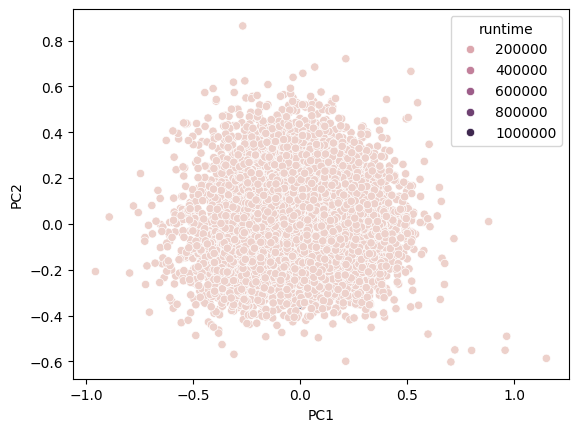

In [238]:
sns.scatterplot( x="PC1", y="PC2", data=movie, hue='runtime')

Outliers make it impossible to interpret the plot. Let's filter out all the movies longer than 200 minutes

In [243]:
run_time_df=movie.loc[movie["runtime"]<200]

<Axes: xlabel='PC1', ylabel='PC2'>

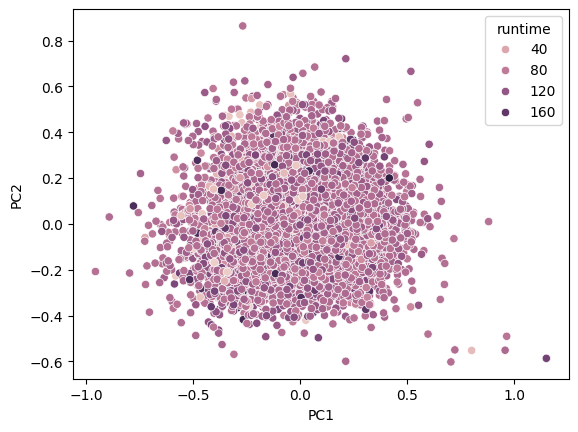

In [244]:
sns.scatterplot( x="PC1", y="PC2", data=run_time_df, hue='runtime')

2. `action`

<Axes: xlabel='PC1', ylabel='PC2'>

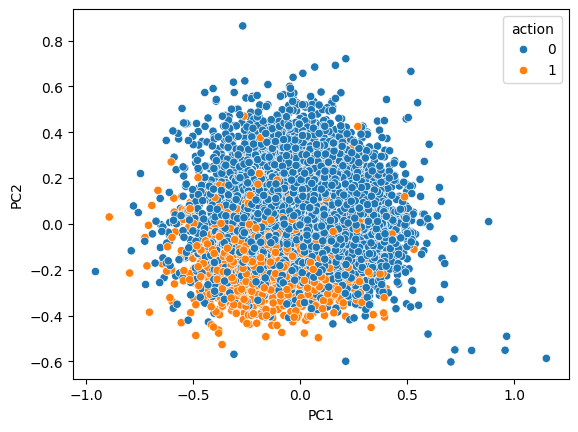

In [241]:
sns.scatterplot( x="PC1", y="PC2", data=movie, hue='action')

3. `drama`

<Axes: xlabel='PC1', ylabel='PC2'>

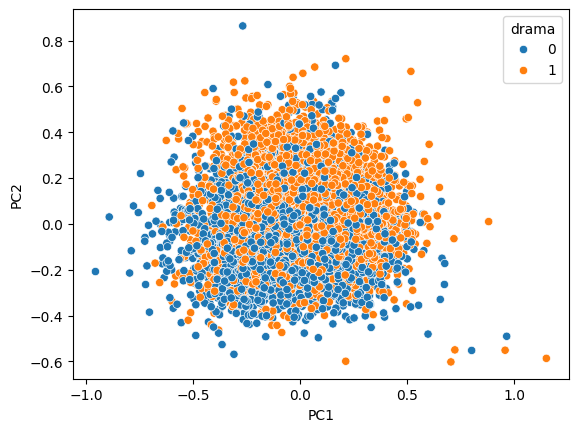

In [242]:
sns.scatterplot( x="PC1", y="PC2", data=movie, hue='drama')

## Interpretation

The word embeddings model that we chose was the English Wikipedia model from the Gensim library. This was a model that was reccomended to us, and we did not find the part of speech tags to make the coding any more difficult. This specific model was trained on the English Wikipedia dump in 2021, which was useful for our data because the movie summaries in our dataset were pulled from Wikipedia. Selecting a model that was trained on the same source that our data was from controls for any drastic differences in writing style across sources. 

Our clustering algorithm created 3 clusters from our parameters that we selected based on the results from measuring the inertia of varying number of clusters. When we graphed our clusters though, all of the movie summaries seemed to be in one large group, that was divided into 3 subsections, meaning that the clusters were all close together. Our choice of doing 3 clusters could have affected our results, but was based on the number of clusters that had the most additional inertia.

For the ranked similarity DataFrames, we focused on "Iron Man" and "Pirates of Treasure Island" and found the films with the most similar summaries. Similar films to "Iron Man" were mostly other action or superhero movies, including "Iron Man 2". These films may have been identified as having the most similar summaries, becasue the words iron and man are not typically associated, but appear often in these summaries. Also, between "Iron Man" and "Iron Man 2" they both have very similar titles, except for the series number, which means their summaries are most likely to be similar. For "Pirates of Treasure Island" the most similar movie summaries were all about either Pirates or Islands. Both of these words are in the original movie that we were examining, and are not usually common words, which might be why they showed up in the similar movie summaries.

First, we looked at the year and genre of the films, to see whether they made up the different clusters. For both of these variables, there did not seem to be a clear division between them, which would suggest that our model could not recognize the year or genre of a movie. However, we also looked specifically at the runtime of films, whether they were action films, and wheter they were drama films, in order to analyze what kinds of similarities the word embeddings seemed to recognize. When we first started looking at the runtime, there were outliers that made the graph difficult to understand. We took out these outliers to get a more detailed image of how the runtime of the movies clustered together, and we found that there was a variety of runtimes across the clusters, meaning the word embeddings did not recognize that. When we looked at the action dummy variable, it was noticable that the action movies all clumped in the bottom lefthand corner, meaning that the word embeddings model was able to recogize them as similar. It is not certian that that is what made up one of the clusters from our K-means clustering, but the action movies were generally recognized as similar. The same happened for the drama movies. The drama movies were more spread out than the action movies, but there was a much clearer division than with the runtime. This means that the model was able to recognize that the drama movies did have similarities, but not as well as it was able to recognize the similarities amoung action movies. This is interesting that it was able to recognize wheter a film was action, or drama, but that this was not evident when we were looking at all of the genres together.

## Conclusion

In our analysis, when we first did the K-means clustering we found that there were 3 strong clusters among the movie summaries. However, when we graphed them to visualize the clusters, it seemed like there was one large cluster that was split into 3 sub clusters. This made it difficult to pinpoint how the clusters were formed. A strength of the model is that it was able to cluster movie summaries together, but a limitation was in the separation between these clusters. We wanted to see how the movie summaries were clustered together, so we highlighted specific variables from the metadata to see if they had similar overlap to the K-means clusters. One of the limitations of the dataset was that there were some outliers in the runtime variable, which made examining this variable difficult on the graph, because it would group ranges of runtimes together, and the majority of the movies were grouped in the same range. In the future, we could change the number of clusters for our model, to see if it groups different variables together, or has more alignment with the metadata variables. 

Though it may be interesting to see how the number of clusters impacts how movie summaries are clustered together, we ultimately used the Elbow Method to see what an optimal number of clusters would be. Using this method was efficient for us because it meant that we didn’t have to try multiple cluster numbers and decide which one seemed best, we were able to examine the inertia of the number of clusters to see what was most useful for the model’s performance. Additionally, this makes our code more reproducible, as we did not chose an arbitrary number of clusters. We were also able to evaluate the performance of our model by testing common word associations before running it on our dataset. After we ran the model on our dataset we also looked at the nearest neighbors to selected movies to see if they were in a similar genre, or had other similarities that would make sense for them to be grouped together. This was important to check because it related to the performance of our model.

## References

David Bamman, Brendan O’Connor, and Noah A. Smith. 2013. "Learning Latent Personas of Film Characters." Proceedings of the 51st Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers): 352–361